In [1]:
%load_ext autoreload
%autoreload 2

import torch

In [3]:
from architectures.backbones import MobileNet

In [6]:
model = MobileNet.mobilenet_v2(pretrained=True)

In [10]:
a = torch.rand(1,3,512,512)

# default os=32, expect 512//32 with 1280 channels output
b = model(a)
print(b.shape)

torch.Size([1, 1280, 16, 16])


In [13]:
total_params = sum(p.numel() for p in model.parameters())
print(total_params)

2223872


In [16]:
model_half_width = MobileNet.mobilenet_v2(width_mult=0.5)
total_params = sum(p.numel() for p in model_half_width.parameters())
print(total_params)

687680


In [10]:
from train.helpers import *

anchors, grid_sz = create_anchors()
anchor_cnr = hw2corners(anchors[:,:2], anchors[:,2:])
print(anchor_cnr, anchor_cnr.shape)

tensor([[0.0000, 0.0000, 0.2500, 0.2500],
        [0.0000, 0.2500, 0.2500, 0.5000],
        [0.0000, 0.5000, 0.2500, 0.7500],
        [0.0000, 0.7500, 0.2500, 1.0000],
        [0.2500, 0.0000, 0.5000, 0.2500],
        [0.2500, 0.2500, 0.5000, 0.5000],
        [0.2500, 0.5000, 0.5000, 0.7500],
        [0.2500, 0.7500, 0.5000, 1.0000],
        [0.5000, 0.0000, 0.7500, 0.2500],
        [0.5000, 0.2500, 0.7500, 0.5000],
        [0.5000, 0.5000, 0.7500, 0.7500],
        [0.5000, 0.7500, 0.7500, 1.0000],
        [0.7500, 0.0000, 1.0000, 0.2500],
        [0.7500, 0.2500, 1.0000, 0.5000],
        [0.7500, 0.5000, 1.0000, 0.7500],
        [0.7500, 0.7500, 1.0000, 1.0000]]) torch.Size([16, 4])


In [28]:
overlaps = jaccard(anchor_cnr[:3,:], anchor_cnr)

In [32]:
print(overlaps)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [30]:
print(overlaps.max(0))
print(overlaps.max(1))

torch.return_types.max(
values=tensor([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
indices=tensor([0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))
torch.return_types.max(
values=tensor([1., 1., 1.]),
indices=tensor([0, 1, 2]))


In [106]:
import torch
from data.dataloaders import get_dataloaders
valid_dataloader = get_dataloaders()
x, y = next(iter(valid_dataloader))

def prepare_gt(y):
    gt_bbox, gt_clas = [], []
    for obj in y:
        gt_bbox.append(obj['bbox'])
        gt_clas.append(obj['category_id'])
    return [torch.FloatTensor(gt_bbox), torch.IntTensor(gt_clas)]
gt = prepare_gt(y)
overlaps = jaccard(gt[0]/400, anchor_cnr)

loading annotations into memory...
Done (t=1.61s)
creating index...
index created!


In [107]:
print(gt[0]/400, gt[0].shape) 
print(anchor_cnr, anchor_cnr.shape)

tensor([[0.5924, 0.3563, 0.0618, 0.1737],
        [0.0176, 0.4194, 0.3733, 0.2372],
        [1.3930, 0.5230, 0.2034, 0.1968],
        [0.8975, 0.5451, 0.1400, 0.2571],
        [0.7267, 0.5450, 0.1546, 0.2462],
        [1.0330, 0.5575, 0.0754, 0.2034],
        [0.7935, 0.5481, 0.0540, 0.0290],
        [1.0320, 0.3940, 0.1326, 0.3450],
        [0.9611, 0.4305, 0.0378, 0.0894],
        [1.2805, 0.5144, 0.0368, 0.0399],
        [1.2328, 0.4358, 0.0507, 0.2708],
        [1.5119, 0.7647, 0.0358, 0.1143],
        [1.5331, 0.7706, 0.0322, 0.1161],
        [1.1194, 0.3028, 0.0349, 0.0547],
        [1.3727, 0.7736, 0.0917, 0.2242],
        [0.8769, 0.5221, 0.0284, 0.0564],
        [1.0306, 0.5476, 0.0241, 0.0313],
        [0.6031, 0.4875, 0.0356, 0.0441],
        [0.8420, 0.4988, 0.0243, 0.0418],
        [0.8030, 0.5781, 0.3139, 0.2223]]) torch.Size([20, 4])
tensor([[0.0000, 0.0000, 0.2500, 0.2500],
        [0.0000, 0.2500, 0.2500, 0.5000],
        [0.0000, 0.5000, 0.2500, 0.7500],
        [0.00

In [48]:
print(overlaps, overlaps.shape)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0

In [120]:
gt[0] = gt[0][:10,:]
gt[1] = gt[1][:10]

In [121]:
pred = [torch.rand(16,3), torch.rand(16,4)]

In [122]:
from train.loss_fn import *
ssd_loss(pred,gt)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) torch.Size([10, 16])
tensor(186.5933, dtype=torch.float64) tensor(19.9424)


tensor(206.5356, dtype=torch.float64)

In [110]:
a = torch.rand(16,4) * 200
b = gt[0]
print(a, a.shape)
print(b, b.shape)

tensor([[153.0064,  80.8823, 198.8781,  35.6136],
        [180.8414, 182.4262,  22.0338,  69.5659],
        [ 10.8446, 196.4840, 187.8881, 181.4716],
        [ 35.2291, 117.1281,  13.3889, 146.4478],
        [168.3110,  85.3607, 106.4572,  50.5541],
        [ 88.6454,  57.9817, 132.9944, 109.4358],
        [ 53.2612,  36.3674,  48.3278,  85.6277],
        [ 66.2226,  31.7417, 158.3183,  22.4716],
        [ 60.2845, 142.4056, 140.0734,   3.2031],
        [ 93.0411, 133.1347, 161.5353, 198.7372],
        [ 26.2235, 184.2980, 150.0192,  86.2551],
        [ 42.5029,  20.7951, 135.3477,  30.4437],
        [107.6766, 179.3199,  22.5212, 163.7270],
        [172.6823, 112.1219,  74.8049,  48.4421],
        [ 19.8044, 169.8008,  35.1151,  18.4487],
        [ 63.3850,  49.6614,   4.9729, 127.8176]]) torch.Size([16, 4])
tensor([[236.9800, 142.5100,  24.7000,  69.5000],
        [  7.0300, 167.7600, 149.3200,  94.8700],
        [557.2100, 209.1900,  81.3500,  78.7300],
        [358.9800, 218.0500, 

In [132]:
overlap = jaccard(anchor_cnr,anchor_cnr+0.05)

In [133]:
print(overlap, overlap.shape)

tensor([[0.4706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0870, 0.4706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0870, 0.4706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0870, 0.4706, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0870, 0.0000, 0.0000, 0.0000, 0.4706, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0204, 0.0870, 0.0000, 0.0000, 0.0870, 0.4706, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0204, 0.0870, 0.0000, 0.0000, 0.0870, 0.4706, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.00

In [131]:
print(anchor_cnr,anchor_cnr+0.05)

tensor([[0.0000, 0.0000, 0.2500, 0.2500],
        [0.0000, 0.2500, 0.2500, 0.5000],
        [0.0000, 0.5000, 0.2500, 0.7500],
        [0.0000, 0.7500, 0.2500, 1.0000],
        [0.2500, 0.0000, 0.5000, 0.2500],
        [0.2500, 0.2500, 0.5000, 0.5000],
        [0.2500, 0.5000, 0.5000, 0.7500],
        [0.2500, 0.7500, 0.5000, 1.0000],
        [0.5000, 0.0000, 0.7500, 0.2500],
        [0.5000, 0.2500, 0.7500, 0.5000],
        [0.5000, 0.5000, 0.7500, 0.7500],
        [0.5000, 0.7500, 0.7500, 1.0000],
        [0.7500, 0.0000, 1.0000, 0.2500],
        [0.7500, 0.2500, 1.0000, 0.5000],
        [0.7500, 0.5000, 1.0000, 0.7500],
        [0.7500, 0.7500, 1.0000, 1.0000]]) tensor([[0.0500, 0.0500, 0.3000, 0.3000],
        [0.0500, 0.3000, 0.3000, 0.5500],
        [0.0500, 0.5500, 0.3000, 0.8000],
        [0.0500, 0.8000, 0.3000, 1.0500],
        [0.3000, 0.0500, 0.5500, 0.3000],
        [0.3000, 0.3000, 0.5500, 0.5500],
        [0.3000, 0.5500, 0.5500, 0.8000],
        [0.3000, 0.8000, 0.5500, 

In [12]:
import main
main.run('misc/experiments/ssdnet/params.json')

loading annotations into memory...
Done (t=2.05s)
creating index...
index created!
(640, 426)
Epoch: 0 of 10
Batch: 0 of 5000
Batch_loss: 104.55514112706297
(640, 426)
Model saved succesfully


In [35]:
from architectures.models import SSDNet
from data import dataloaders
model = SSDNet.SSD_Head()
train_loader, valid_loader = dataloaders.get_dataloaders()

loading annotations into memory...
Done (t=1.39s)
creating index...
index created!


In [41]:
from train.helpers import *
x, y = next(iter(valid_loader))

(640, 426)


In [7]:
gt = y

In [14]:
gt[0], gt[0].shape

(tensor([[[0.0386, 0.1631, 0.3703, 0.3345],
          [0.0110, 0.2227, 0.2333, 0.3938],
          [0.1271, 0.1848, 0.8706, 0.4911],
          [0.0875, 0.2414, 0.5609, 0.5119],
          [0.0966, 0.2312, 0.4542, 0.5117],
          [0.0471, 0.1910, 0.6456, 0.5235],
          [0.0337, 0.0272, 0.4959, 0.5146],
          [0.0829, 0.3240, 0.6450, 0.3700],
          [0.0236, 0.0839, 0.6007, 0.4042],
          [0.0230, 0.0375, 0.8003, 0.4830],
          [0.0317, 0.2542, 0.7705, 0.4092],
          [0.0224, 0.1073, 0.9450, 0.7181],
          [0.0201, 0.1090, 0.9582, 0.7236],
          [0.0218, 0.0514, 0.6996, 0.2843],
          [0.0573, 0.2105, 0.8579, 0.7264],
          [0.0178, 0.0529, 0.5481, 0.4902],
          [0.0150, 0.0294, 0.6441, 0.5141],
          [0.0222, 0.0414, 0.3769, 0.4577],
          [0.0152, 0.0393, 0.5262, 0.4683],
          [0.1962, 0.2088, 0.5019, 0.5428]]]), torch.Size([1, 20, 4]))

In [12]:
x.shape, anchor_cnr.shape

(torch.Size([1, 3, 224, 224]), torch.Size([16, 4]))

In [23]:
overlaps = jaccard(gt[0].squeeze(), anchor_cnr)

In [24]:
overlaps, overlaps.shape

(tensor([[1.8183e-01, 1.7610e-01, 0.0000e+00, 0.0000e+00, 9.5932e-02, 9.3126e-02,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [6.4249e-02, 4.6626e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [2.8388e-02, 1.1368e-01, 0.0000e+00, 0.0000e+00, 5.9499e-02, 2.6209e-01,
          0.0000e+00, 0.0000e+00, 5.9499e-02, 2.6209e-01, 0.0000e+00, 0.0000e+00,
          2.7854e-02, 1.1137e-01, 0.0000e+00, 0.0000e+00],
         [7.4015e-03, 2.7098e-01, 1.0213e-02, 0.0000e+00, 1.1433e-02, 4.8812e-01,
          1.5799e-02, 0.0000e+00, 2.7614e-03, 8.6852e-02, 3.8037e-03, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [1.8055e-02, 3.0806e-01, 1.1180e-02, 0.0000e+00, 2.4181e-02, 4.5672e-01,
          1.4939e-02, 0.00

In [25]:
for line in overlaps:
    print(torch.max(line))

tensor(0.1818)
tensor(0.4663)
tensor(0.2621)
tensor(0.4881)
tensor(0.4567)
tensor(0.3141)
tensor(0.2717)
tensor(0.1497)
tensor(0.2017)
tensor(0.1662)
tensor(0.2803)
tensor(0.1109)
tensor(0.1084)
tensor(0.2908)
tensor(0.1513)
tensor(0.2563)
tensor(0.2050)
tensor(0.2921)
tensor(0.2402)
tensor(0.6121)


In [26]:
overlaps.max(0), overlaps.max(0)[0].shape

(torch.return_types.max(
 values=tensor([0.2921, 0.4663, 0.1010, 0.0000, 0.2908, 0.6121, 0.1351, 0.0000, 0.2194,
         0.2803, 0.1351, 0.0000, 0.0481, 0.1114, 0.0786, 0.0000]),
 indices=tensor([17,  1, 14, 19, 13, 19, 14, 19, 13, 10, 14, 19, 12,  2, 12, 19])),
 torch.Size([16]))

In [30]:
actn_to_bb(torch.rand(16,4), anchors, 0.25)

tensor([[0.0693, 0.0072, 0.3586, 0.3113],
        [0.0349, 0.2649, 0.3598, 0.5605],
        [0.0791, 0.5525, 0.3587, 0.8196],
        [0.0846, 0.7567, 0.3437, 1.0111],
        [0.2952, 0.0377, 0.6299, 0.3811],
        [0.2874, 0.3238, 0.5389, 0.5993],
        [0.3091, 0.5242, 0.5956, 0.8185],
        [0.2728, 0.7740, 0.6150, 1.0976],
        [0.4841, 0.0264, 0.7930, 0.3346],
        [0.5584, 0.3162, 0.8387, 0.6135],
        [0.5554, 0.5268, 0.8782, 0.8677],
        [0.5082, 0.7945, 0.7821, 1.0864],
        [0.8036, 0.0340, 1.0770, 0.3708],
        [0.8137, 0.2888, 1.0646, 0.5420],
        [0.8101, 0.5385, 1.0740, 0.8475],
        [0.7441, 0.7850, 1.0332, 1.0720]])

In [17]:
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from data.dataset import CocoDetection

composed_transforms = transforms.Compose([transforms.ToTensor()])

validation_dataset = CocoDetection(root='../../COCO/val2017/val2017',
                                          annFile='../../COCO/annotations_trainval2017/annotations/instances_val2017.json',
                                          transform=composed_transforms)

loading annotations into memory...
Done (t=1.44s)
creating index...
index created!


In [18]:
x,y = next(iter(validation_dataset))
x.size
len(y)

(640, 426)


2

In [19]:
y[0]

tensor([[0.0386, 0.1631, 0.3703, 0.3345],
        [0.0110, 0.2227, 0.2333, 0.3938],
        [0.1271, 0.1848, 0.8706, 0.4911],
        [0.0875, 0.2414, 0.5609, 0.5119],
        [0.0966, 0.2312, 0.4542, 0.5117],
        [0.0471, 0.1910, 0.6456, 0.5235],
        [0.0337, 0.0272, 0.4959, 0.5146],
        [0.0829, 0.3240, 0.6450, 0.3700],
        [0.0236, 0.0839, 0.6007, 0.4042],
        [0.0230, 0.0375, 0.8003, 0.4830],
        [0.0317, 0.2542, 0.7705, 0.4092],
        [0.0224, 0.1073, 0.9450, 0.7181],
        [0.0201, 0.1090, 0.9582, 0.7236],
        [0.0218, 0.0514, 0.6996, 0.2843],
        [0.0573, 0.2105, 0.8579, 0.7264],
        [0.0178, 0.0529, 0.5481, 0.4902],
        [0.0150, 0.0294, 0.6441, 0.5141],
        [0.0222, 0.0414, 0.3769, 0.4577],
        [0.0152, 0.0393, 0.5262, 0.4683],
        [0.1962, 0.2088, 0.5019, 0.5428]])

In [20]:
y[1]

tensor([64, 72, 72, 62, 62, 62, 62,  1,  1, 78, 82, 84, 84, 85, 86, 86, 62, 86,
        86, 67], dtype=torch.int32)

In [22]:
x.shape

torch.Size([3, 224, 224])

In [23]:
import cv2

cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

ModuleNotFoundError: No module named 'cv2'

In [3]:
from train.helpers import *
from data.dataloaders import get_dataloaders


valid, valid = get_dataloaders()

loading annotations into memory...
Done (t=1.26s)
creating index...
index created!


(640, 426)
[[ 13  58 133 120]
 [  3  80  83 141]
 [ 45  66 313 176]
 [ 31  86 201 184]
 [ 34  83 163 184]
 [ 16  68 232 188]
 [ 12   9 178 185]
 [ 29 116 232 133]
 [  8  30 216 145]
 [  8  13 288 173]
 [ 11  91 277 147]
 [  8  38 340 258]
 [  7  39 344 260]
 [  7  18 251 102]
 [ 20  75 308 261]
 [  6  19 197 176]
 [  5  10 231 185]
 [  7  14 135 164]
 [  5  14 189 168]
 [ 70  75 180 195]]
<class 'numpy.ndarray'> (224, 224, 3)


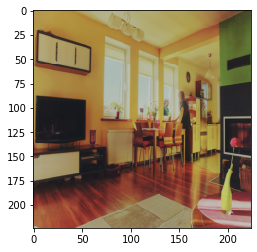

<class 'numpy.ndarray'> (224, 224, 3)


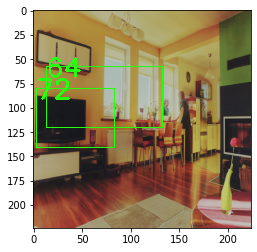

In [11]:
%matplotlib inline
visualize_data(valid)